In [1]:
# importing of libaries
import numpy as np                      #functions for scientific computing, faster arrays
import pandas as pd                     #easy import and export of data, fast and easy-to-use datastructure
import math                             #mathematical functions
import matplotlib.pyplot as plt         #generation of Graphs
import seaborn as sns                   #generation of Graphs
import scipy as sci
from scipy.constants import pi, g       #fundamental Constants
import Leistung as lei                  #Eigenes Modul um Leistung und Fahrtwiderstaende zu berechnen   

In [2]:
# document paths
path_data_idle1 = "data/idle1.csv"
path_data_drive1 = "data/drive1.csv"
path_data_live1 = "data/live1.csv"
path_data_ufpe1 = "data/ufpe1.csv"
path_data_long1 = "data/long1.csv"
graphs ="graphs/"

paths = (path_data_idle1, path_data_drive1, path_data_live1, path_data_ufpe1, path_data_long1)
length = len(paths)
data = list()  #list of pandas Dataframes
names = list() #list of the names of the data sets
for i in range(length):
    data.append(pd.read_csv(paths[i]))
    data[i]["VEHICLE_SPEED ()"] = data[i]["VEHICLE_SPEED ()"]/3.6 #transformation from kmh to m/s
    names.append(paths[i][5:-4]) #Abschneiden von data/ und .csv

In [3]:
# Constants
d_wheel = .583 #m Reifendurchmesser
#Source: https://tirewheelguide.de/sizes/toyota/etios-liva/2014/

In [4]:
# Wheel rotation from speed
# pV: speed in m/s
def n_Rad(pV):
    return (pV) / (d_wheel * pi)

In [5]:
for i in range(length):
    data[i]= data[i].assign(N_RAD = data[i]['VEHICLE_SPEED ()'].apply(n_Rad))

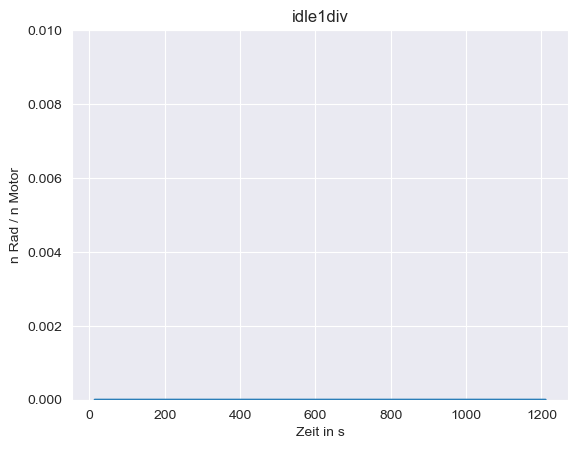

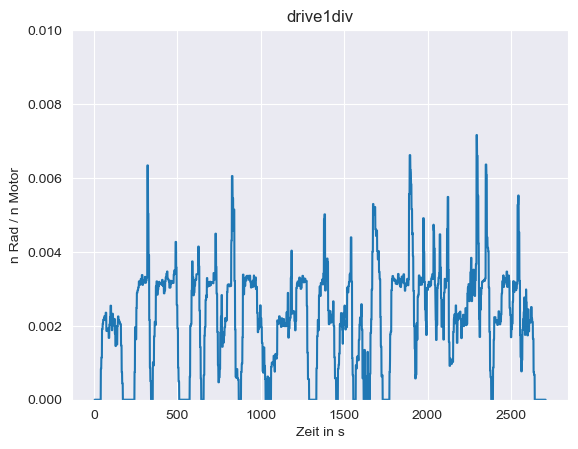

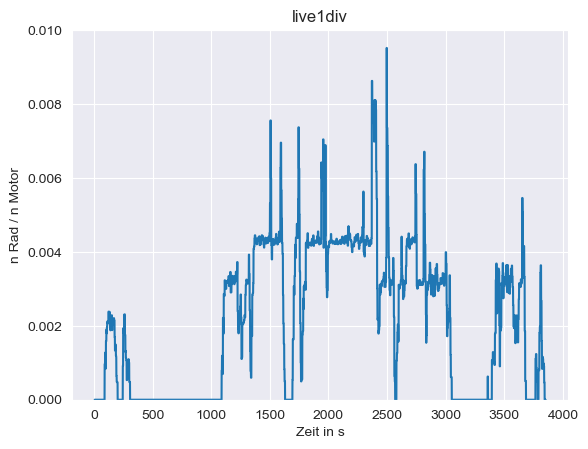

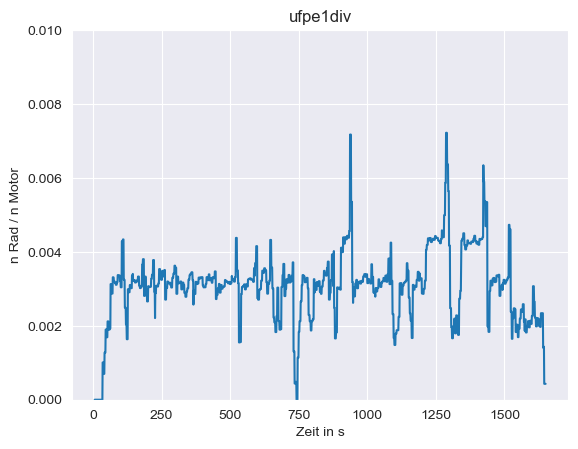

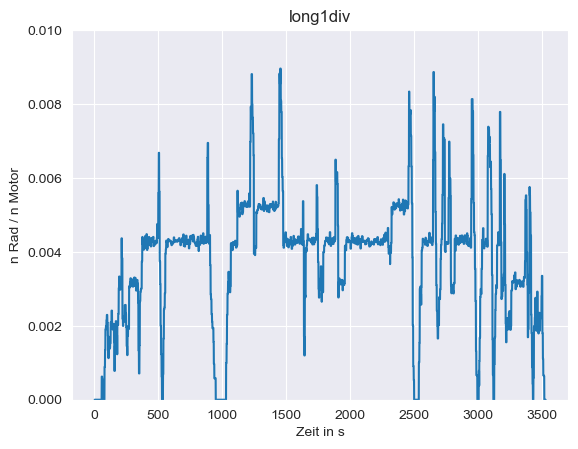

In [6]:
for i in range(length):
    local_length = int(data[i].shape[0])
    div = np.zeros(length)
    div = data[i]["N_RAD"]/data[i]["ENGINE_RPM ()"]
    plt.plot(div)
    plt.title(names[i]+"div")
    plt.xlabel("Zeit in s")
    plt.ylabel("n Rad / n Motor")
    plt.ylim(0, 0.01)
    plt.savefig(graphs+"div_"+names[i]+".png",dpi=300)
    plt.grid(True)
    plt.show()

weiteres vorgehen für die Bestimmung der Gänge, bereiche in denen sich die Drehzahl länger aufhält finden und für den x bereich den Durchschnitt bilden

## Beschleunigung

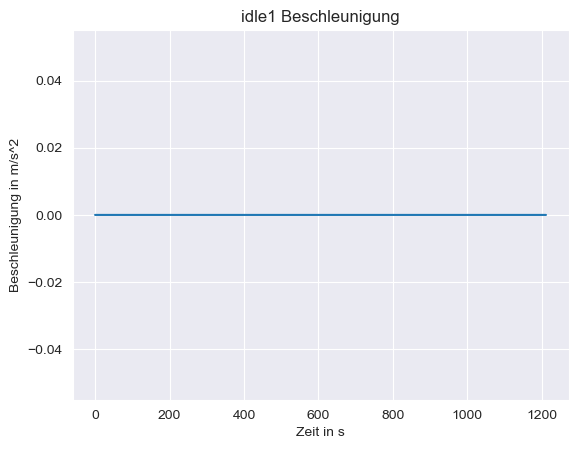

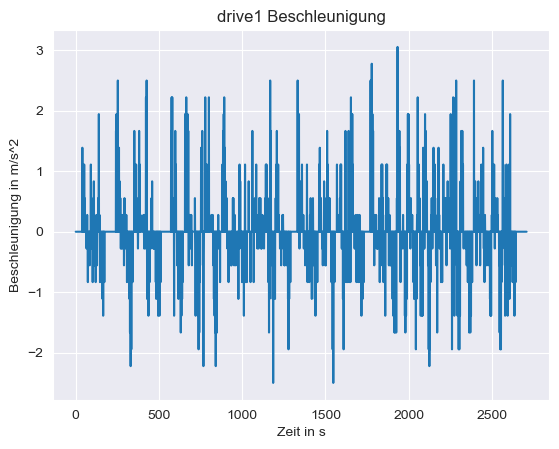

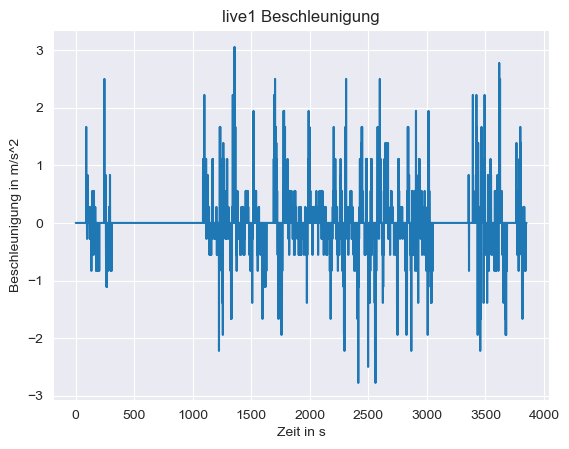

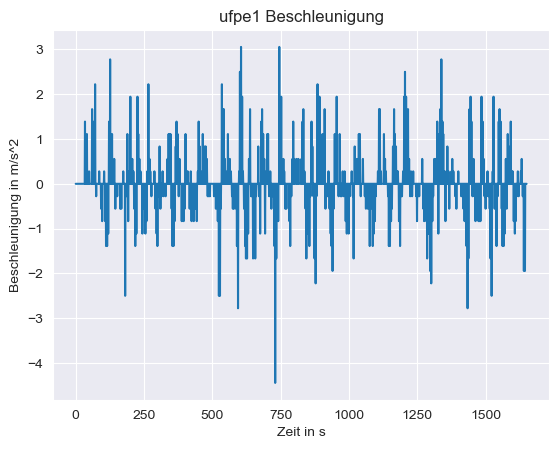

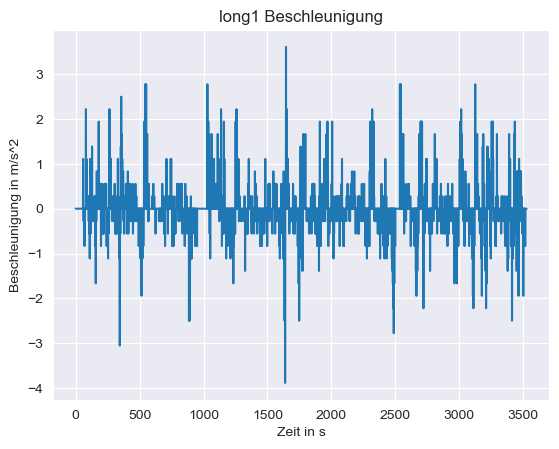

In [7]:
for i in range(length):   
    local_length = int(data[i].shape[0])
    acc =np.zeros(local_length)
    for j in range(local_length-1):
        acc[j]=data[i]["VEHICLE_SPEED ()"][j+1]-data[i]["VEHICLE_SPEED ()"][j] #teilen durch Zeit entfällt, da delta t = 1s
    
    data[i] = data[i].assign(BESCHLEUNIGUNG =acc)
    plt.plot(acc)
    plt.title(names[i]+" Beschleunigung")
    plt.xlabel("Zeit in s")
    plt.ylabel("Beschleunigung in m/s^2")
    plt.grid(True)
    plt.savefig(graphs+"beschleunigung_"+names[i]+".png",dpi=300)
    plt.show()

In [8]:
# zum test berechnung der Geschwindigkeit auf grundlage der ermittelten Beschleunigung
#gesch =np.zeros(length) 
#for i in range(length):
    #if 0 != i:
   #     gesch[i] = gesch[i-1]+acc[i-1] #mal zeit entfällt, da delta t = 1s
  #  else:
 #       gesch[i] = 0
#plt.plot(data_drive1["VEHICLE_SPEED ()"],color="orange",linewidth=4)
#plt.plot(gesch,color="blue",linewidth=1)
#plt.xlabel("Zeit in s")
#plt.ylabel("Geschwindigkeit")
#plt.grid(True)
#plt.savefig("gesch.png")
#plt.show()

## Power

In [9]:

def leistung_1(pDataframe):
    laenge = int(pDataframe.shape[0]) #Bestimmung der Laenge des Dataframes
    leist = np.zeros(laenge)
    for i in range(laenge-1):
        leist[i] = lei.leistung_1(pDataframe["VEHICLE_SPEED ()"][i],pDataframe["BESCHLEUNIGUNG"][i],0)
    return leist

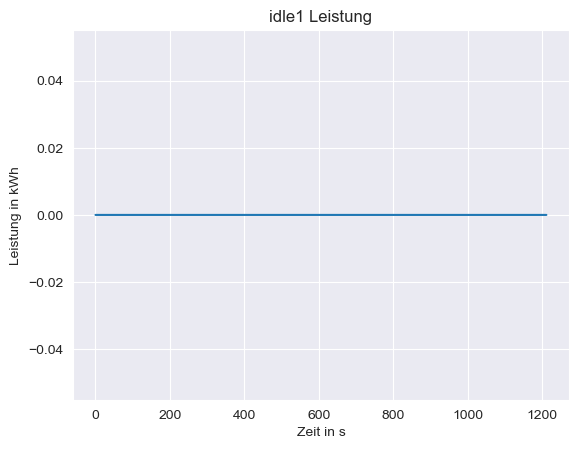

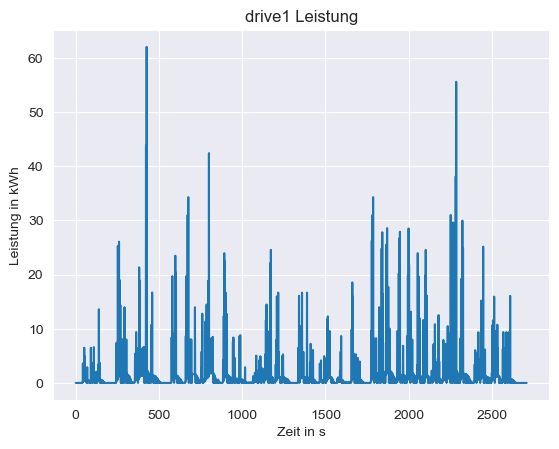

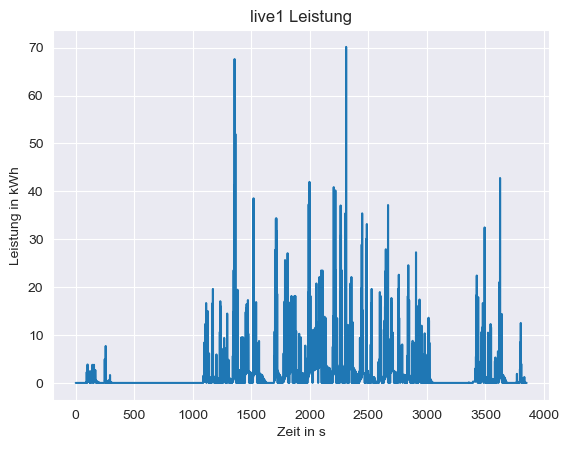

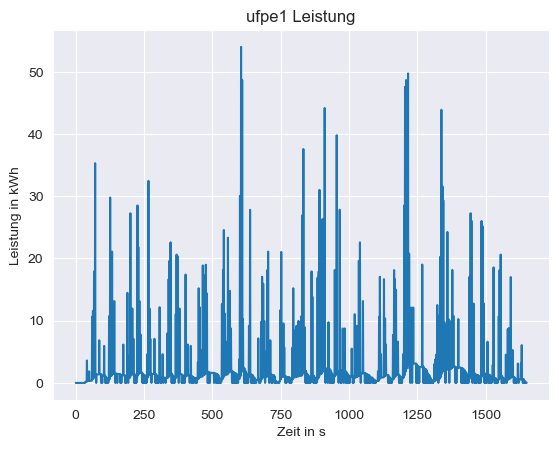

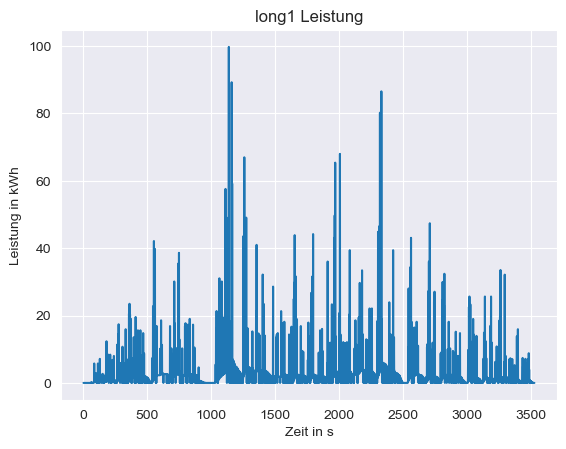

In [10]:
for i in range(length):
    local_length = int(data[i].shape[0])
    leist = np.zeros(local_length)
    for j in range(local_length-1):
        leist[j] = lei.leistung_1(data[i]["VEHICLE_SPEED ()"][j],data[i]["BESCHLEUNIGUNG"][j],0) #Funktion zur Berechnung der Aktuellen Leistung
    data[i] = data[i].assign(LEISTUNG=leist)
    plt.plot(leist/1000)
    plt.title(names[i]+" Leistung")
    plt.xlabel("Zeit in s")
    plt.ylabel("Leistung in kWh")
    plt.grid(True)
    plt.savefig(graphs+"leistung_"+names[i]+".png",dpi=300)
    plt.show()

In [11]:
data[2]

,Index (),ENGINE_RUN_TINE (),ENGINE_RPM (),VEHICLE_SPEED (),THROTTLE (),ENGINE_LOAD (),COOLANT_TEMPERATURE (),LONG_TERM_FUEL_TRIM_BANK_1 (),SHORT_TERM_FUEL_TRIM_BANK_1 (),INTAKE_MANIFOLD_PRESSURE (),...,CATALYST_TEMPERATURE_BANK1_SENSOR2 (),CONTROL_MODULE_VOLTAGE (),COMMANDED_EVAPORATIVE_PURGE (),TIME_RUN_WITH_MIL_ON (),TIME_SINCE_TROUBLE_CODES_CLEARED (),DISTANCE_TRAVELED_WITH_MIL_ON (),WARM_UPS_SINCE_CODES_CLEARED (),N_RAD,BESCHLEUNIGUNG,LEISTUNG
0,0.0,0,0.0,0.0,17.647058,0.000000,25,-2.34375,0.00,101,...,295.100006,12.324,0.0,0,7835,0,255,0.0,0.0,0.0
1,0.0,0,0.0,0.0,17.647058,0.000000,25,-2.34375,0.00,101,...,295.100006,12.343,0.0,0,7835,0,255,0.0,0.0,0.0
2,0.0,0,0.0,0.0,17.647058,0.000000,25,-2.34375,0.00,101,...,295.100006,12.343,0.0,0,7835,0,255,0.0,0.0,0.0
3,0.0,0,0.0,0.0,18.039215,0.000000,25,-2.34375,0.00,101,...,295.100006,12.343,0.0,0,7835,0,255,0.0,0.0,0.0
4,0.0,0,0.0,0.0,18.039215,0.000000,25,-2.34375,0.00,101,...,295.100006,12.343,0.0,0,7835,0,255,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3848,NaN,1891,974.0,0.0,18.823530,33.725491,88,-0.78125,-6.25,36,...,352.399994,13.613,0.0,0,7866,0,255,0.0,0.0,0.0
3849,NaN,1891,974.0,0.0,18.823530,33.725491,88,-0.78125,-6.25,36,...,352.299988,13.593,0.0,0,7866,0,255,0.0,0.0,0.0
3850,NaN,1891,974.0,0.0,18.823530,33.725491,88,-0.78125,-6.25,36,...,352.299988,13.593,0.0,0,7866,0,255,0.0,0.0,0.0
3851,NaN,1893,929.5,0.0,16.470589,32.941177,88,-0.78125,-6.25,33,...,352.299988,13.593,0.0,0,7866,0,255,0.0,0.0,0.0


## Comparison Plots

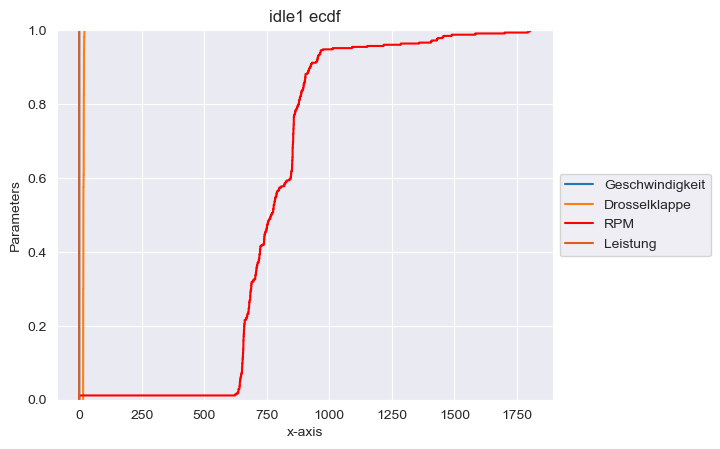

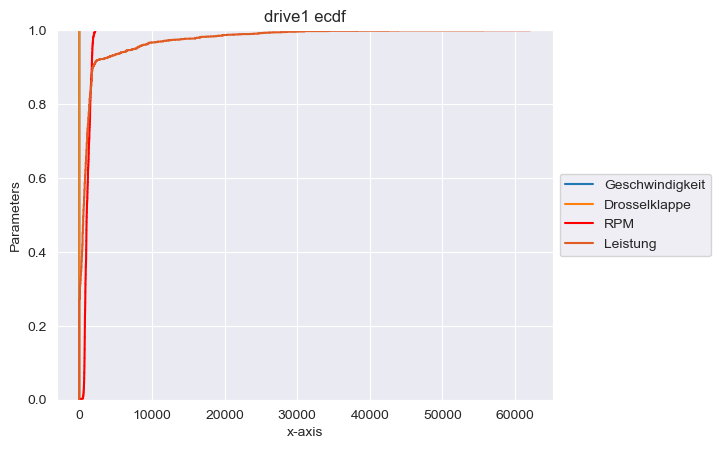

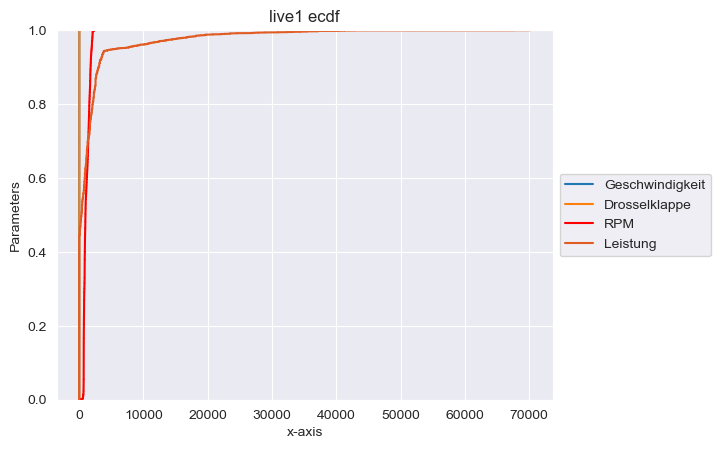

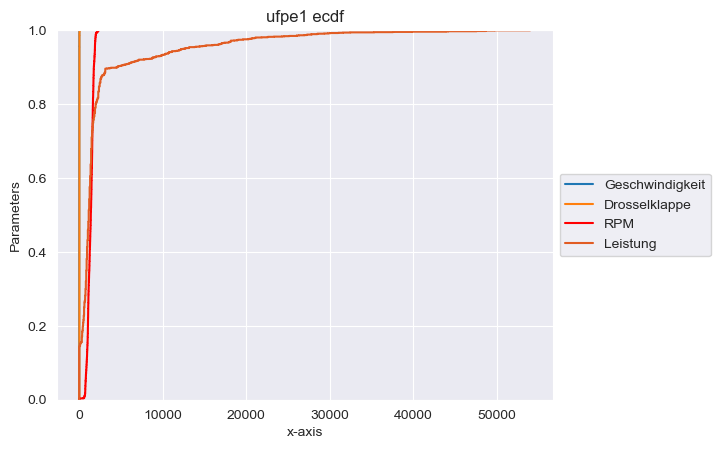

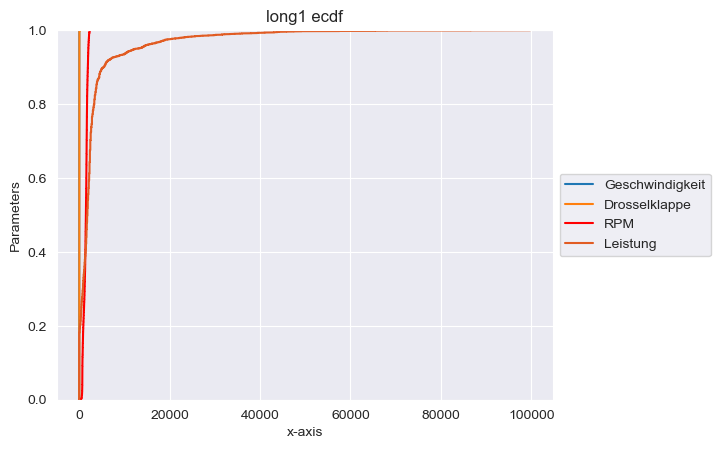

In [12]:
# per Mode
for i in range(length):
    #plt.style.use('_mpl-gallery-nogrid')
    plt.ecdf(data[i]["VEHICLE_SPEED ()"], label='Geschwindigkeit')
    plt.ecdf(data[i]["THROTTLE ()"], label='Drosselklappe')
    plt.ecdf(data[i]["ENGINE_RPM ()"], label='RPM', color="red")
    plt.ecdf(data[i]["LEISTUNG"], label='Leistung', color="#E15C23")
    
    plt.title(names[i]+" ecdf")
    plt.xlabel('x-axis')
    plt.ylabel('Parameters')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.savefig(graphs+"ecdf_"+names[i]+".png",dpi=300, bbox_inches='tight')
    plt.show()

### Pearson Correlation
describes the strength and direction of an linear correlation between two continous datasets

In [13]:
# Geschwindigkeit und Leistung 
# r:statistics
# If r = 1, it indicates a perfect positive linear relationship.
# If r = -1, it indicates a perfect negative linear relationship.
# If r = 0, it indicates no linear relationship between the variables.
# p > 0.05 keine Korrelation
# p < 0.05 eine Korrelation
print("Pearson Geschwindigkeit und Leistung:")
for i in range(length):
    print(names[i])
    print(sci.stats.pearsonr(data[i]["VEHICLE_SPEED ()"],data[i]["LEISTUNG"]))

Pearson Geschwindigkeit und Leistung:
idle1
PearsonRResult(statistic=nan, pvalue=nan)
drive1
PearsonRResult(statistic=0.2179600121756242, pvalue=1.7132697236397572e-30)
live1
PearsonRResult(statistic=0.3429812463614293, pvalue=8.273456767257525e-107)
ufpe1
PearsonRResult(statistic=0.093378810335781, pvalue=0.00014490338506707539)
long1
PearsonRResult(statistic=0.22859120085464613, pvalue=4.731299431289965e-43)


/Users/julius/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [14]:
# Drosselklappe und Leistung 
# If r = 1, it indicates a perfect positive linear relationship.
# If r = -1, it indicates a perfect negative linear relationship.
# If r = 0, it indicates no linear relationship between the variables.
# p > 0.05 keine Korrelation
# p < 0.05 eine Korrelation
print("Pearson Drosselklappe und Leistung:")
for i in range(length):
    print(names[i])
    print(sci.stats.pearsonr(data[i]["THROTTLE ()"],data[i]["LEISTUNG"]))

Pearson Drosselklappe und Leistung:
idle1
PearsonRResult(statistic=nan, pvalue=nan)
drive1
PearsonRResult(statistic=0.3932565346126504, pvalue=6.817100219094546e-101)
live1
PearsonRResult(statistic=0.43473859678513926, pvalue=1.961078675820774e-177)
ufpe1
PearsonRResult(statistic=0.375288056298057, pvalue=2.295586989085299e-56)
long1
PearsonRResult(statistic=0.4085348550757749, pvalue=5.067641338878227e-142)


In [15]:
# RPM und Leistung 
# If r = 1, it indicates a perfect positive linear relationship.
# If r = -1, it indicates a perfect negative linear relationship.
# If r = 0, it indicates no linear relationship between the variables.
# p > 0.05 keine Korrelation
# p < 0.05 eine Korrelation
print("Pearson RPM und Leistung:")
for i in range(length):
    print(names[i])
    print(sci.stats.pearsonr(data[i]["ENGINE_RPM ()"],data[i]["LEISTUNG"]))

Pearson RPM und Leistung:
idle1
PearsonRResult(statistic=nan, pvalue=nan)
drive1
PearsonRResult(statistic=0.2745432995759666, pvalue=4.788544621627728e-48)
live1
PearsonRResult(statistic=0.35940981995773436, pvalue=7.7500099620462024e-118)
ufpe1
PearsonRResult(statistic=0.1658422665746151, pvalue=1.1977217532324021e-11)
long1
PearsonRResult(statistic=0.2713689618681032, pvalue=1.3336123297096687e-60)


## Ausgabe

In [16]:
for i in range(length):
    data[i].to_csv("data/v2_"+names[i])

In [17]:
# output of key values
dauer = np.zeros(length) # in s
max_geschwindigkeit = np.zeros(length) # in km/h
max_beschleunigung = np.zeros(length) # in m/s^2
min_beschleunigung = np.zeros(length) # in m/s^2
max_Leistung = np.zeros(length) #in kW
min_Leistung = np.zeros(length) #in kW
for i in range(length):
    dauer[i] = int(data[i].shape[0])
    max_geschwindigkeit[i] = round(data[i]["VEHICLE_SPEED ()"].max(),2)
    max_beschleunigung[i] = round(data[i]["BESCHLEUNIGUNG"].max(),2)
    min_beschleunigung[i] = round(data[i]["BESCHLEUNIGUNG"].min(),2)
    max_Leistung[i] =  round(data[i]["LEISTUNG"].max()/1000,2)
    min_Leistung[i] = round(data[i]["LEISTUNG"].min()/1000,2)

output = pd.DataFrame({"Dauer in s": dauer,
                       "max Geschwindigkeit in m/s": max_geschwindigkeit,
                       "max Geschwindigkeit in km/h":max_geschwindigkeit*3.6,
                       "max Beschleunigung in m/s^2": max_beschleunigung,
                       "min Beschleunigung im m/s^2": min_beschleunigung,
                       "max Leistung in kW": max_Leistung,
                       "min Leistung in kW": min_Leistung}
                      ,index = names)
output.to_excel("output.xlsx")